In [88]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import xgboost as xgb
import seaborn as sns 
import statsmodels.discrete.discrete_model as sm
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
plt.style.use('ggplot')
from statsmodels.formula.api import ols

In [54]:
banki=pd.read_csv('Dane_bank_nowe.csv', sep=',')
banki = banki.drop(["Unnamed: 0", 'RowNumber'], axis=1)

In [55]:
banki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [56]:
banki_cp=banki.copy(deep=True)

In [57]:
def div_2(x):
    if x >= 640:
        return 0
    else:
        return 1

banki['CreditScore_2']=banki.apply(lambda x: div_2(x['CreditScore']),axis=1 )

In [58]:
def div_5(x):
    if x < 580:
        return 0
    elif x>=580 and x<640:
        return 1
    elif x>=640 and x<720:
        return 2
    elif x>=720 and x<=780:
        return 3
    else:
        return 4

banki['CreditScore_5']=banki.apply(lambda x: div_5(x['CreditScore']),axis=1 )
banki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
CreditScore_2      10000 non-null int64
CreditScore_5      10000 non-null int64
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


### Predykcja dla podziału CreditScore na dwie grupy
0 dla CreditScore >= 640

1 dla CreditScore < 640

In [59]:
yy,XX=dmatrices('CreditScore_2~Age+Balance+IsActiveMember+EstimatedSalary', 
               banki, return_type='dataframe')

In [60]:
X_train, X_test, y_train, y_test=train_test_split(XX,yy, test_size=0.3, random_state=42)

In [61]:
model=sm.Logit(endog=y_train, exog=X_train)

In [62]:
result_model=model.fit()

Optimization terminated successfully.
         Current function value: 0.102488
         Iterations 10


In [63]:
result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          CreditScore_2   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6995
Method:                           MLE   Df Model:                            4
Date:                Tue, 27 Aug 2019   Pseudo R-squ.:                  0.8507
Time:                        16:02:48   Log-Likelihood:                -717.42
converged:                       True   LL-Null:                       -4806.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          23.9241      0.943     25.357      0.000      22.075      25.773
Age                 0.1477      0.007     19.891      0.000       0.133       0.162
Balance          1.428e-06    1.2e-06      1.186      0.236   -9.32e-07    3.79e-06
IsActiveMember     -4.3362      0.209    -20.741      0.000      -4.746      -3.926
EstimatedSalary  -2.41e-05   8.14e-07    -29.616      0.000   -2.57e-05   -2.25e-05
===================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [110]:
model2=LogisticRegression()
model2.fit(X_train, y_train)

C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
model2.score(X_test, y_test)

0.6643333333333333

In [112]:
y_pred=model2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.98      0.76      1599
         1.0       0.94      0.30      0.46      1401

    accuracy                           0.66      3000
   macro avg       0.78      0.64      0.61      3000
weighted avg       0.77      0.66      0.62      3000



In [113]:
confusion_matrix(y_test,y_pred)

array([[1572,   27],
       [ 980,  421]], dtype=int64)

In [67]:
model3=xgb.XGBClassifier()

In [68]:
model3.fit(X_train, y_train)

C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
model3.score(X_test, y_test)

0.975

In [70]:
y_pred3=model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1599
         1.0       1.00      0.95      0.97      1401

    accuracy                           0.97      3000
   macro avg       0.98      0.97      0.97      3000
weighted avg       0.98      0.97      0.97      3000



In [114]:
confusion_matrix(y_test,y_pred3)

array([[1593,    6],
       [  69, 1332]], dtype=int64)

### Predykcja dla podziału CreditScore na 5 grup

0 dla CreditScore x < 580:

1 dla 580 <= CreditScore < 640

2 dla 640 <= CreditScore < 720 

3 dla 720 <= CreditScore <= 780

4 dla CreditScore > 780


In [71]:
y5,X5=dmatrices('CreditScore_5~Age+Balance+IsActiveMember+EstimatedSalary',
                banki, return_type='dataframe')

In [72]:
X_train5, X_test5, y_train5, y_test5=train_test_split(X5,y5, test_size=0.3, random_state=42)

In [73]:
model5=LogisticRegression()
model5.fit(X_train5, y_train5)

C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
model5.score(X_test5, y_test5)

0.39266666666666666

In [75]:
y_pred5=model5.predict(X_test5)
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

         0.0       0.71      0.37      0.49       745
         1.0       0.00      0.00      0.00       656
         2.0       0.35      0.99      0.51       913
         3.0       0.00      0.00      0.00       416
         4.0       0.00      0.00      0.00       270

    accuracy                           0.39      3000
   macro avg       0.21      0.27      0.20      3000
weighted avg       0.28      0.39      0.28      3000



C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [115]:
confusion_matrix(y_test5,y_pred5)

array([[277,   0, 468,   0,   0],
       [ 93,   0, 563,   0,   0],
       [ 12,   0, 901,   0,   0],
       [  7,   0, 409,   0,   0],
       [  0,   0, 270,   0,   0]], dtype=int64)

In [76]:
model6=xgb.XGBClassifier()

In [77]:
model6.fit(X_train5, y_train5)

C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [78]:
model6.score(X_test5, y_test5)

0.863

In [79]:
y_pred6=model6.predict(X_test5)
print(classification_report(y_test5, y_pred6))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       745
         1.0       0.97      0.85      0.91       656
         2.0       0.84      0.94      0.89       913
         3.0       0.70      0.52      0.59       416
         4.0       0.67      0.85      0.75       270

    accuracy                           0.86      3000
   macro avg       0.83      0.83      0.82      3000
weighted avg       0.86      0.86      0.86      3000



In [116]:
confusion_matrix(y_test5,y_pred6)

array([[730,  15,   0,   0,   0],
       [ 32, 555,  69,   0,   0],
       [  0,   0, 859,  54,   0],
       [  0,   0,  90, 215, 111],
       [  0,   0,   1,  39, 230]], dtype=int64)

In [80]:
test_scores = []

for i in range(1,31):  #dla bardzo wielu k od 1 do 14

    model7 = KNeighborsClassifier(i)
    model7.fit(X_train5,y_train5)

    test_scores.append(model7.score(X_test5, y_test5))

C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

In [81]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.5 % and k = [1, 3]


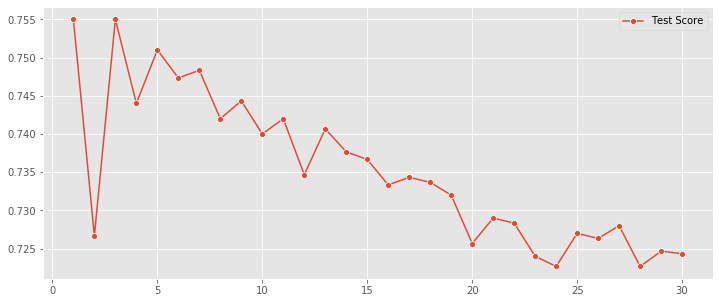

In [82]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [83]:
model7 = KNeighborsClassifier(1)

model7.fit(X_train5,y_train5)
model7.score(X_test5,y_test5)

C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.755

In [84]:
y_pred7=model7.predict(X_test5)
print(classification_report(y_test5, y_pred7))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       745
         1.0       0.72      0.69      0.71       656
         2.0       0.80      0.83      0.81       913
         3.0       0.55      0.56      0.55       416
         4.0       0.63      0.60      0.61       270

    accuracy                           0.76      3000
   macro avg       0.72      0.71      0.71      3000
weighted avg       0.75      0.76      0.75      3000



In [117]:
confusion_matrix(y_test5,y_pred7)

array([[664,  81,   0,   0,   0],
       [ 87, 455,  87,  25,   2],
       [  0,  63, 754,  74,  22],
       [  0,  28,  87, 231,  70],
       [  0,   2,  18,  89, 161]], dtype=int64)

### Przewidywanie dla samego CreditScore 
LinearRegression

In [90]:
CS_train, CS_test =train_test_split(banki, test_size=0.3, random_state=42)

In [95]:
model8=ols('CreditScore~Age+IsActiveMember+EstimatedSalary', data=CS_train).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CreditScore   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 1.392e+04
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:39:45   Log-Likelihood:                -35104.
No. Observations:                7000   AIC:                         7.022e+04
Df Residuals:                    6996   BIC:                         7.024e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         337.1533      2.299    146.640      0.000     332.646     341.660
Age                -1.6140      0.042    -38.165      0.000      -1.697      -1.531
IsActiveMember     57.9928      0.913     63.490      0.000      56.202      59.783
EstimatedSalary     0.0003    1.5e-06    204.287      0.000       0.000       0.000
==============================================================================
Omnibus:                      154.777   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.658
Skew:                          -0.069   Prob(JB):                     4.14e-19
Kurtosis:                       2.479   Cond. No.                     6.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
XCS=banki.iloc[:, [5, 10, 11]].values
yCS=banki.iloc[:,2].values

XCS_train, XCS_test, yCS_train, yCS_test =train_test_split(XCS, yCS, test_size=0.3, random_state=42)

In [98]:
model9=xgb.XGBRegressor(booster='gbtree')
model9.fit(XCS_train, yCS_train)
y_pred9=model9.predict(XCS_test)

[16:46:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [100]:
stats.describe(y_pred9)

DescribeResult(nobs=3000, minmax=(388.99023, 822.07135), mean=646.2595, variance=8508.351, skewness=-0.15472359955310822, kurtosis=-0.5668899552267899)

In [101]:
r2_score(yCS_test, y_pred9)

0.9424334229995213

In [102]:
model10=LinearRegression()
model10.fit(XCS_train, yCS_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
y_pred10=model10.predict(XCS_test)

In [104]:
r2_score(yCS_test, y_pred10)

0.8630060254529648

## Podsumowanie

Stworzyłam kilka modeli do opisania trzech zadadnień.

Do tworzenia modeli użyłam 3 zmiennych, których wpływ wegług podsumowań był najistotniejszy, są to: **Age, IsActiveMember** oraz **EstimatedSalary**.

Co ciekawe zmienne takie jak Balance, HasCrCard i NumOfProducts nie miały wpływu na wyniki podczas estymacji modeli (w senie wynik się nie zmienił po ich usunięciu) chociaż spodziewałabym się po nich, że będą miały znaczenie w predykcji i klasyfikacji CreditScore.

`CreditScore podzielony na dwie grupy`

gdzie:
- 0 jest dla CreditScore >= 640
- 1 dla CreditScore < 640

| Model | pseudoR-squ/score [%] |
|---|---|
| statsmodel-Logit | 85.1 |
| LogisticRegression | 66.6 |
| XGBClassifier | 97.5 |


`CreditScore podzielony na 5 grup`

gdzie:
- 0 dla CreditScore x < 580:
- 1 dla 580 <= CreditScore < 640
- 2 dla 640 <= CreditScore < 720 
- 3 dla 720 <= CreditScore <= 780
- 4 dla CreditScore > 780

| Model | score [%] |
|---|---|
| LogisticRegression | 39.3 |
| XGBClassifier | 86.3 |
| KNNClassifier | 75.5 |


`CreditScore - sam w sobie, przez regresję`

| Model | R2-score [%] |
|---|---|
| LinearRegression | 86.3 |
| statsmodel - OLS | 85.7 |
| XGBRegression | 94.2 |

